In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


feature_set = pd.read_csv("solubility_classification.csv")
feature_set = feature_set.select_dtypes('float64')

label_set = pd.read_csv("solubility_classification.csv")
label_set = label_set['Solubility']

X = feature_set.values
Y = label_set.values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model():
    model = keras.Sequential([
        layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(4, activation="relu"),
        layers.Dense(1,activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model
model = build_model()

history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Y_pred = model.predict(X_test)
Y_pred_classes = (Y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(Y_test, Y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

"""
Training Accuracy: 0.8471
Test Accuracy: 0.8363
Confusion Matrix:
[[818 171]
 [156 852]]


"""

Training Accuracy: 0.8471
Test Accuracy: 0.8363
Confusion Matrix:
[[818 171]
 [156 852]]


'\nTraining Accuracy: 0.8813\nTest Accuracy: 0.8548\nConfusion Matrix:\n[[842 147]\n [143 865]]\n\n'

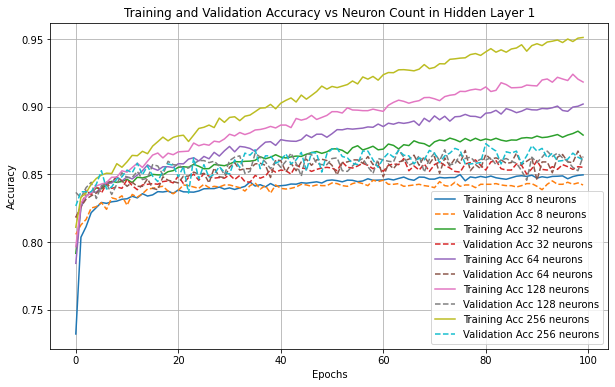

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

feature_set = pd.read_csv("solubility_classification.csv")
feature_set = feature_set.select_dtypes('float64')

label_set = pd.read_csv("solubility_classification.csv")
label_set = label_set['Solubility']

X = feature_set.values
Y = label_set.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

neuron_combinations = [(8,4), (32, 16), (64, 32), (128, 64), (256, 128)]

def build_model(n1, n2):
    model = keras.Sequential([
        layers.Dense(n1, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(n2, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

performance_dict = {}

for n1, n2 in neuron_combinations:
    model = build_model(n1, n2)
    perf = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=0)
    performance_dict[n1] = {
        "training_acc": perf.history["accuracy"],
        "validation_acc": perf.history["val_accuracy"]
    }

plt.figure(figsize=(10, 6))
for n1, _ in neuron_combinations:
    plt.plot(performance_dict[n1]['training_acc'], label=f'Training Acc {n1} neurons')
    plt.plot(performance_dict[n1]['validation_acc'], linestyle='--', label=f'Validation Acc {n1} neurons')

plt.title('Training and Validation Accuracy vs Neuron Count in Hidden Layer 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

final_model = build_model(256, 128)
final_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=0)



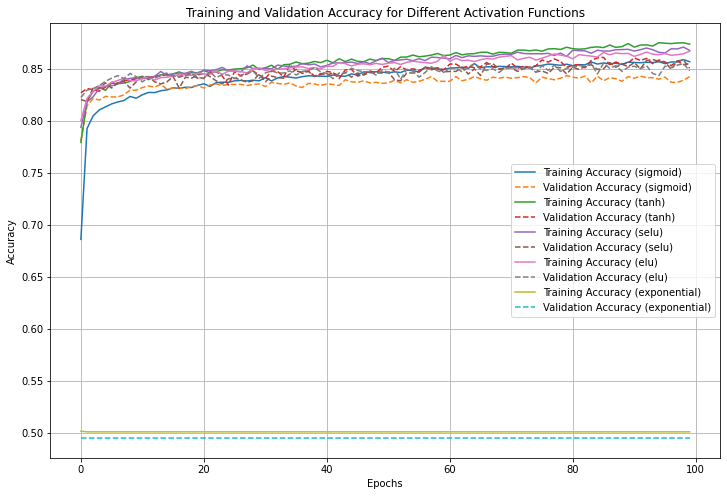

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

feature_set = pd.read_csv("solubility_classification.csv").select_dtypes('float64')
label_set = pd.read_csv("solubility_classification.csv")['Solubility']

X = feature_set.values
Y = label_set.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

activation_functions = ["sigmoid", "tanh", "selu", "elu", "exponential"]

#going with (32,16) neuron set up because it has mix of good validation performance, and not big differnece between validation and testing performance, from part B
def build_model(hidden_activation):
    model = keras.Sequential([
        layers.Dense(32, activation=hidden_activation, input_shape=(X_train.shape[1],)),
        layers.Dense(16, activation=hidden_activation),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

performance_dict = {}

for activation in activation_functions:
    model = build_model(activation)
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=0)
    performance_dict[activation] = {
        "training_acc": history.history["accuracy"],
        "validation_acc": history.history["val_accuracy"]
    }

plt.figure(figsize=(12, 8))
for activation in activation_functions:
    plt.plot(performance_dict[activation]['training_acc'], label=f'Training Accuracy ({activation})')
    plt.plot(performance_dict[activation]['validation_acc'], linestyle='--', label=f'Validation Accuracy ({activation})')

plt.title('Training and Validation Accuracy for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


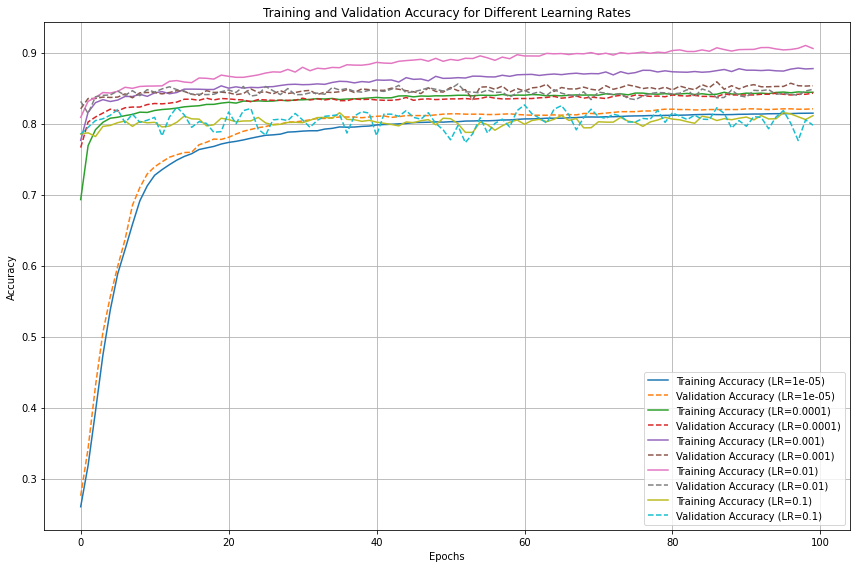

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("solubility_classification.csv")
feature_set = data.select_dtypes('float64')
label_set = data['Solubility']

X = feature_set.values
Y = label_set.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

def build_model(learning_rate):
    model = keras.Sequential([
        layers.Dense(32, activation="tanh", input_shape=(X_train.shape[1],)),
        layers.Dense(16, activation="tanh"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss="binary_crossentropy", metrics=["accuracy"])
    return model

performance_dict = {}

for lr in learning_rates:
    model = build_model(learning_rate=lr)
    history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=0)
    performance_dict[lr] = {
        "training_acc": history.history["accuracy"],
        "validation_acc": history.history["val_accuracy"]
    }

plt.figure(figsize=(12, 8))
for lr in learning_rates:
    plt.plot(performance_dict[lr]['training_acc'], label=f'Training Accuracy (LR={lr})', linestyle='-')
    plt.plot(performance_dict[lr]['validation_acc'], linestyle='--', label=f'Validation Accuracy (LR={lr})')

plt.title('Training and Validation Accuracy for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


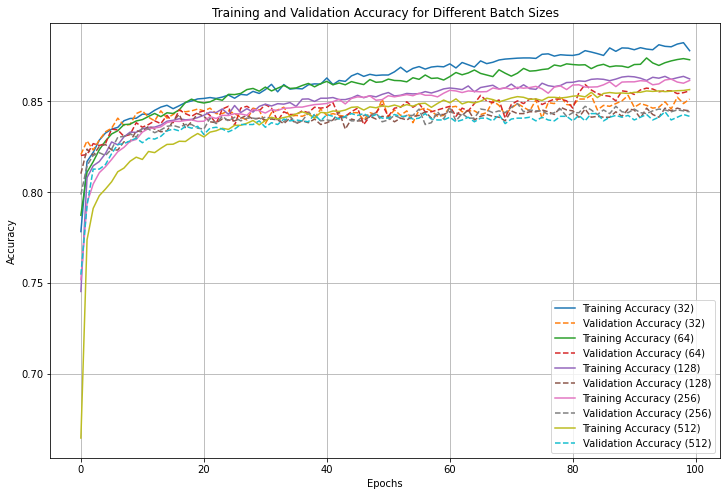

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

feature_set = pd.read_csv("solubility_classification.csv").select_dtypes('float64')
label_set = pd.read_csv("solubility_classification.csv")['Solubility']

X = feature_set.values
Y = label_set.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Batch_Size = [32, 64, 128, 256, 512]

#going with (32,16) neuron set up because it has mix of good validation performance, and not big differnece between validation and testing performance, from part B
#going with tanh for activation of hidden layers, due to results from part C
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation="tanh", input_shape=(X_train.shape[1],)),
        layers.Dense(16, activation="tanh"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

performance_dict = {}

for batch in Batch_Size:
    model = build_model()
    history = model.fit(X_train, Y_train, epochs=100, batch_size=batch, validation_data=(X_test, Y_test), verbose=0)
    performance_dict[batch] = {
        "training_acc": history.history["accuracy"],
        "validation_acc": history.history["val_accuracy"]
    }

plt.figure(figsize=(12, 8))
for batch in Batch_Size:
    plt.plot(performance_dict[batch]['training_acc'], label=f'Training Accuracy ({batch})')
    plt.plot(performance_dict[batch]['validation_acc'], linestyle='--', label=f'Validation Accuracy ({batch})')

plt.title('Training and Validation Accuracy for Different Batch Sizes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


feature_set = pd.read_csv("solubility_classification.csv")
feature_set = feature_set.select_dtypes('float64')

label_set = pd.read_csv("solubility_classification.csv")
label_set = label_set['Solubility']

X = feature_set.values
Y = label_set.values

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1,activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model
model = build_model()

history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy:.4f}')

test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Y_pred = model.predict(X_test)
Y_pred_classes = (Y_pred > 0.5).astype(int)

conf_matrix = confusion_matrix(Y_test, Y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)


"""
Results from A:
Training Accuracy: 0.8471
Test Accuracy: 0.8363
Confusion Matrix:
[[818 171]
 [156 852]]



Results from F:
Training Accuracy: 0.9456
Test Accuracy: 0.8608
Confusion Matrix:
[[826 163]
 [115 893]]

 
Comparison:
With the larger hidden layer, there is a higher likely-hood of overfitting, as we see here.
The training accuracy makes a large leap from .84 to .94. However, the test accuracy still
improves here from .83 to .86, so the overfitting doesn't seem drastic from this test, and our
model still over all seems to benefit from a larger hidden layer complex. 
"""






Training Accuracy: 0.9456
Test Accuracy: 0.8608
Confusion Matrix:
[[826 163]
 [115 893]]
